In [30]:
import os
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
from utils.plots import plot_l, plot_model_pred, plot_losses
from utils.models import UNet, save_model, load_model, EncoderDecoderGenerator
from utils.metrics import evaluate_model
from utils.training import train_cnn, load_losses
device = "cuda" if torch.cuda.is_available() else "cpu"
import random

In [31]:
transform = transforms.Compose([
    transforms.Grayscale(), 
    transforms.Resize((256, 256)),
    transforms.ToTensor()          
])

In [32]:
def process_images(input_folder):
    grayscale_images = []
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)
            img_gray = transform(img)
            grayscale_images.append(img_gray)
            print(f"Processed {image_path} and converted to grayscale")
    return grayscale_images

def plot_pred(image, model, device, rot = 0):
    if rot == 0:
        plot_l(image)
        plot_model_pred(image, model, device)
    if rot == 90:
        plot_l(torch.rot90(image, k=1, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=1, dims=(1, 2)), model, device)
    if rot == -90:
        plot_l(torch.rot90(image, k=-1, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=-1, dims=(1, 2)), model, device)
    if rot == 180:
        plot_l(torch.rot90(image, k=2, dims=(1, 2)))
        plot_model_pred(torch.rot90(image, k=2, dims=(1, 2)), model, device)

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed
set_seed(1)

In [33]:
input_folder = '/home/default/image-colorization/test_images/'

grayscale_images_list = process_images(input_folder)

model = load_model(UNet(), "/home/default/image-colorization/models/unet_l1smooth_trained.pth").to(device)

Processed /home/default/image-colorization/test_images/IMG-20220811-WA0009.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/20240417_083247.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_6.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/IMG-20220925-WA0021.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_3.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/IMG-20220929-WA0028.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/Tezza_2022_08_01_181842352.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.01_4.jpg and converted to grayscale
Processed /home/default/image-colorization/test_images/CamScanner 05-26-2024 15.06.jpg and converted to grayscale
Proce

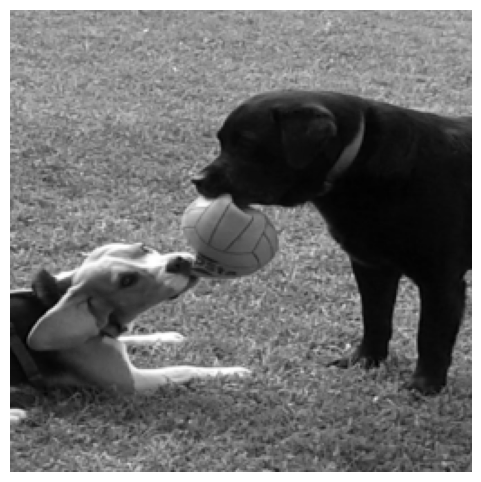

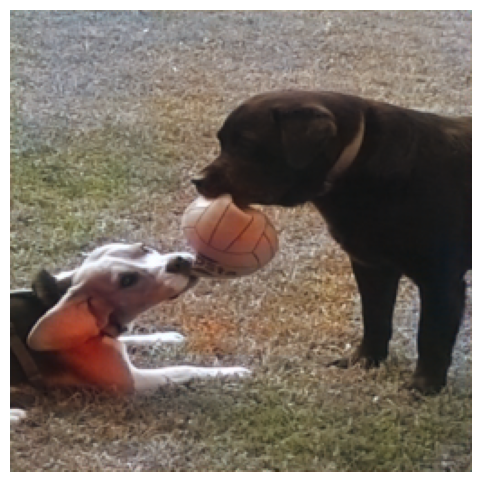

In [34]:
plot_pred(grayscale_images_list[3], model, device)

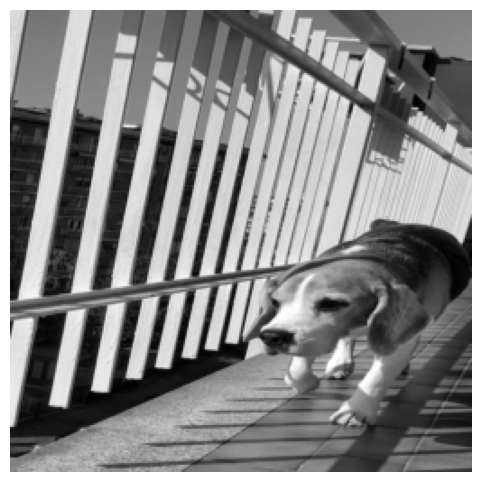

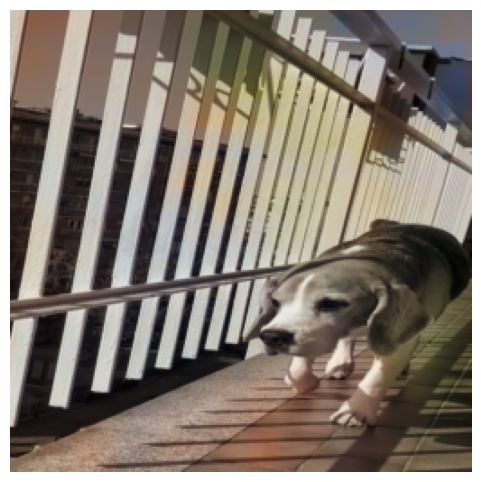

In [35]:
plot_pred(grayscale_images_list[-1], model, device)

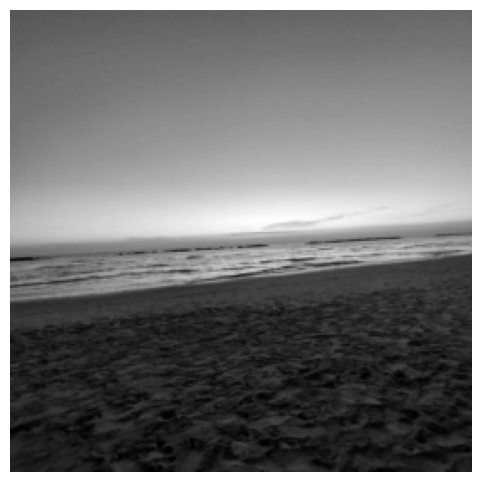

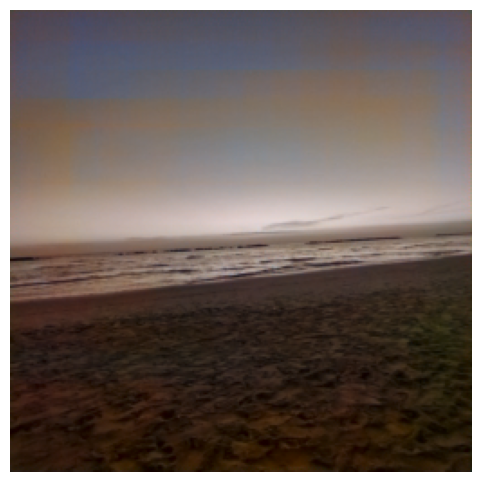

In [36]:
plot_pred(grayscale_images_list[0], model, device)

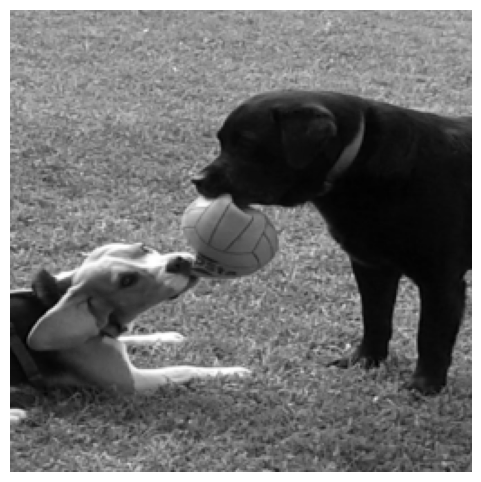

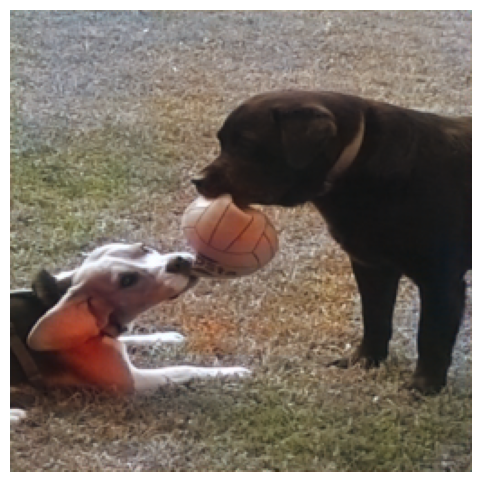

In [38]:
plot_pred(grayscale_images_list[3], model, device)

In [55]:
model = load_model(EncoderDecoderGenerator(), "/home/default/image-colorization/models/localgen0.pth").to(device)

EncoderDecoderGenerator model loaded successfully!


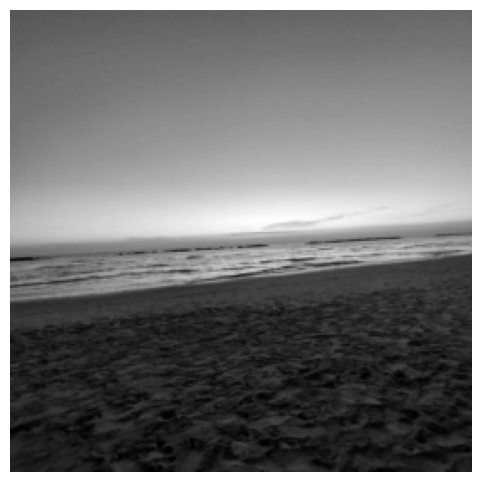

/home/default/image-colorization/utils/plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 19 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


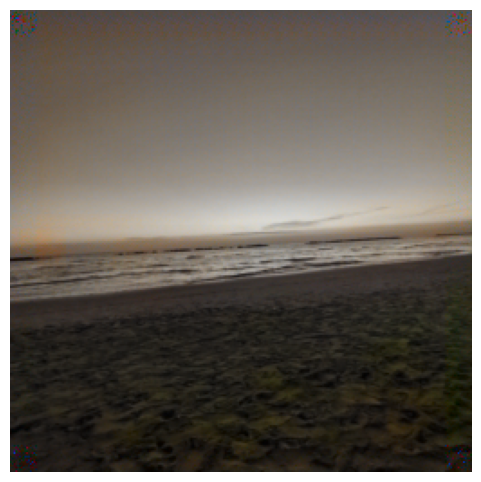

In [56]:
plot_pred(grayscale_images_list[0], model, device)

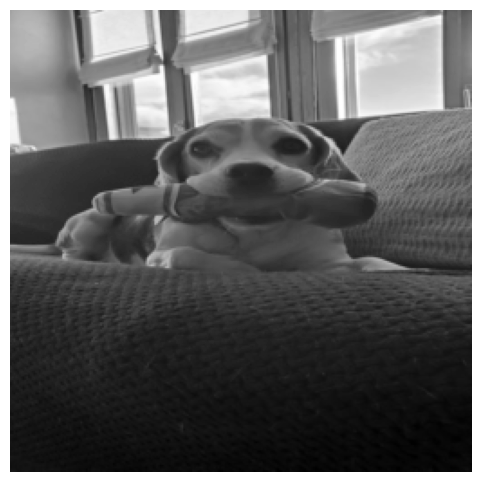

/home/default/image-colorization/utils/plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 13 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


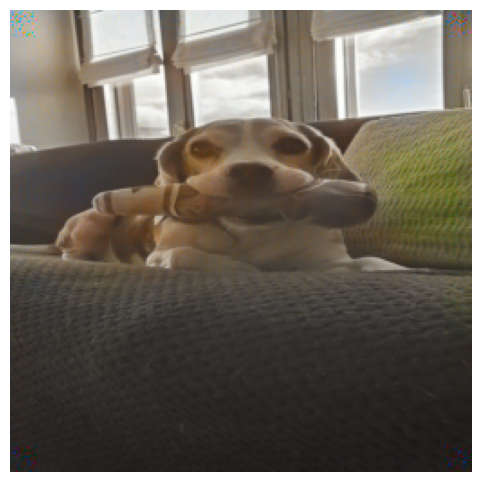

In [60]:
plot_pred(grayscale_images_list[1], model, device)

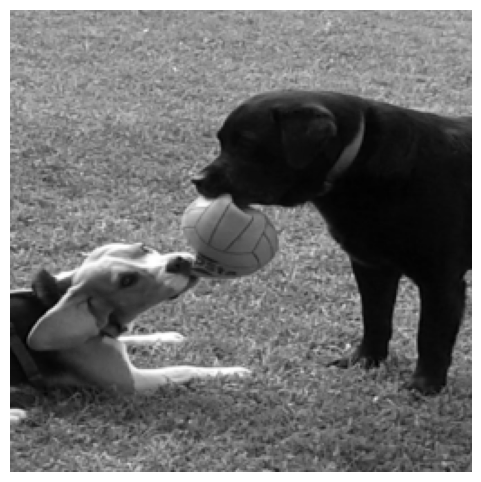

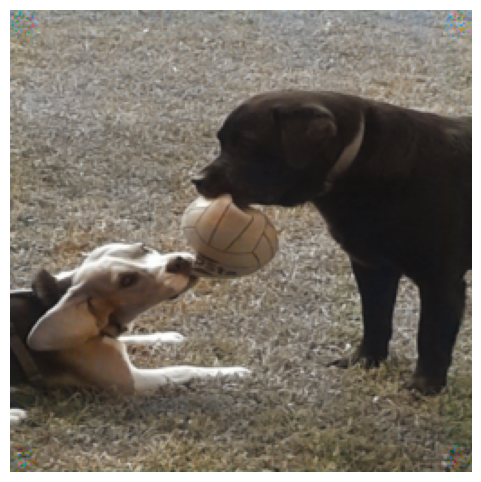

In [58]:
plot_pred(grayscale_images_list[3], model, device)

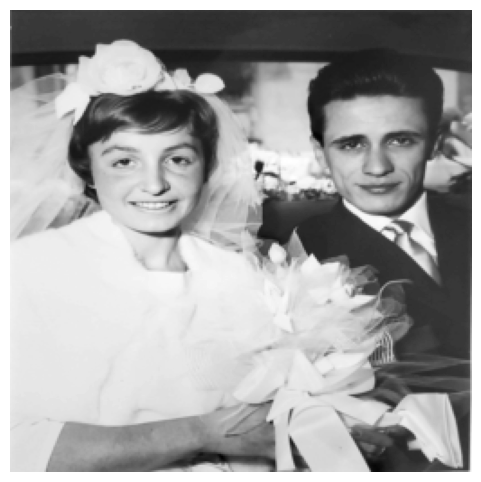

/home/default/image-colorization/utils/plots.py:129: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 9 negative Z values that have been clipped to zero
  rgb_image = lab2rgb(lab_image_reconstructed)


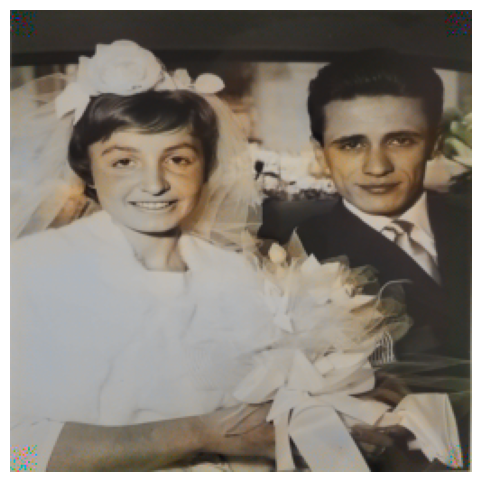

In [68]:
plot_pred(grayscale_images_list[8], model, device)

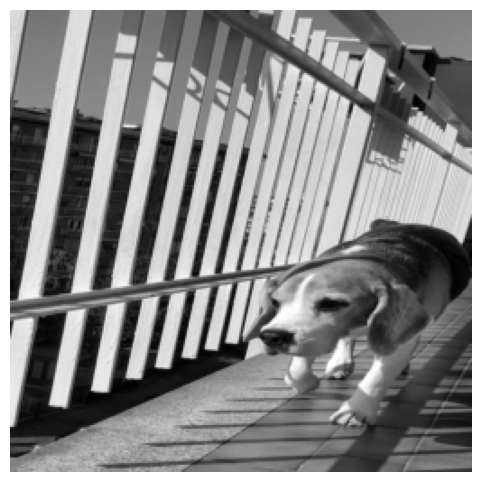

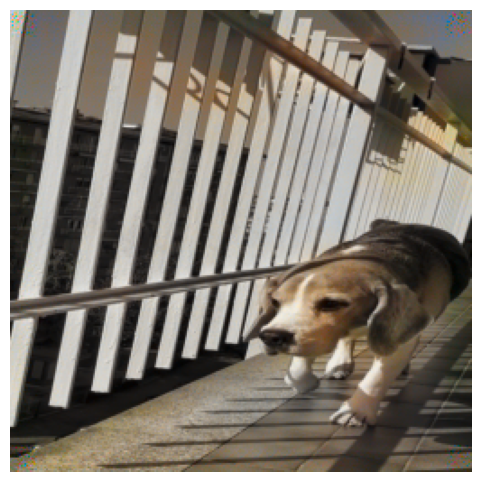

In [75]:
plot_pred(grayscale_images_list[14], model, device)